# Impact of Recession on Automobile Sales

![Impact of Recession on Automobile Sales](pictures/car_on_money.png)

In this analysis we will try to understand the historical trends in automobile sales during recession periods.
- Recession period 1: year 1980
- Recession period 2: year 1981 to 1982
- Recession period 3: year 1991
- Recession period 4: year 2000 to 2001
- Recession period 5: year end 2007 to mid 2009
- Recession period 6: year 2020 - Feb to April (Covid-19 Impact)

## Data Description

The dataset we will be using contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession periods.

The dataset includes the following variables:
1. **Date**: The date of the observation.
2. **Recession**: A binary variable indicating recession period; 1 means it was recession, 0 means it was normal.
3. **Automobile_Sales**: The number of vehicles sold during the period.
4. **GDP**: The per capita GDP value in USD.
5. **Unemployment_Rate**: The monthly unemployment rate.
6. **Consumer_Confidence**: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
7. **Seasonality_Weight**: The weight representing the seasonality effect on automobile sales during the period.
8. **Price**: The average vehicle price during the period.
9. **Advertising_Expenditure**: The advertising expenditure of the company.
10. **Vehicle_Type**: The type of vehicles sold; Superminicar, Small family car, Medium family car, Executive car, Sports.
11. **Competition**: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
12. **Month**: Month of the observation extracted from Date.
13. **Year**: Year of the observation extracted from Date.

By examining various factors mentioned above from the dataset, we aim to gain insights into how recessions impacted automobile sales for this company.

## Questions to Explore
1. How do automobile sales trend over time during recession and non-recession periods?
2. What is the distribution of automobile sales during recession and non-recession periods?
3. Is there a significant difference in automobile sales between recession and non-recession periods?
4. How do automobile sales vary across different regions during recession periods?
5. How does the recession impact sales of different vehicle types?

## Automobile Sales Dataset

In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind
from IPython.display import Image

# Load historical automobile sales data
df = pd.read_csv('data/historical_automobile_sales.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows of the dataframe
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,1980-02-29,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,1980-03-31,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,1980-04-30,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,1980-05-31,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


## How do automobile sales trend over time during recession and non-recession periods?

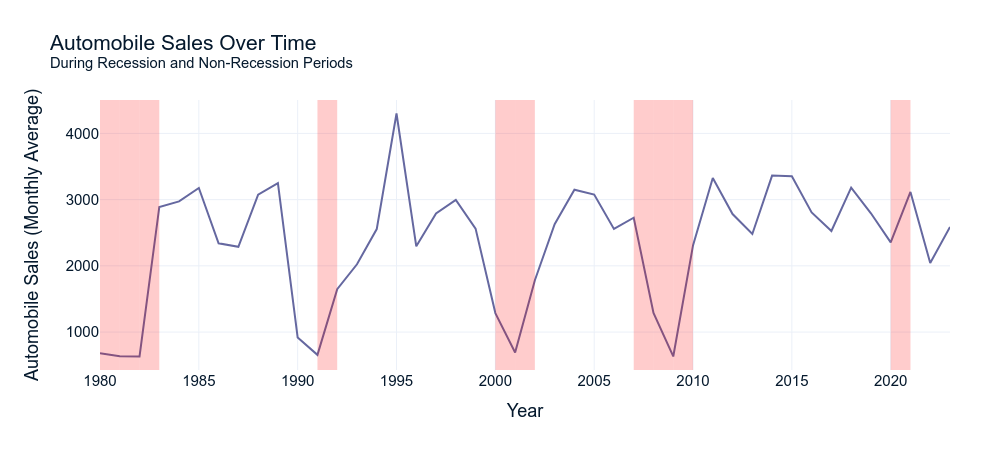

In [26]:
# Calculate the yearly average automobile sales
df['Year'] = df['Date'].dt.year
yearly_avg_sales = df.groupby('Year')['Automobile_Sales'].mean().reset_index()

# Plot automobile sales over time using Plotly
fig = px.line(yearly_avg_sales, x='Year', y='Automobile_Sales', 
              title='Automobile Sales Over Time<br><sup>During Recession and Non-Recession Periods</sup>',
              labels={'Automobile_Sales': 'Automobile Sales (Monthly Average)'})

# Increase font size and add left margin ...
fig.update_layout(font=dict(size=15), 
                  margin=dict(l=100, r=50)) 

# Highlight recession years in red
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
for year in recession_years:
    fig.add_vrect(x0=year, x1=year+1, fillcolor="red", opacity=0.2, line_width=0)

# Save and display the plot 
fig.write_image("pictures/automobile_sales_over_time.png", width=1000, height=450)
display(Image("pictures/automobile_sales_over_time.png"))

The time series graph reveals a cyclical pattern in automobile sales, with distinct periods of higher sales during non-recession times and sharp declines during recessions (highlighted in red). The graph also shows that while recessions cause significant drops, the industry tends to recover quickly once the recession ends, returning to pre-recession levels in a relatively short time.

---

## What is the distribution of automobile sales during recession and non-recession periods?

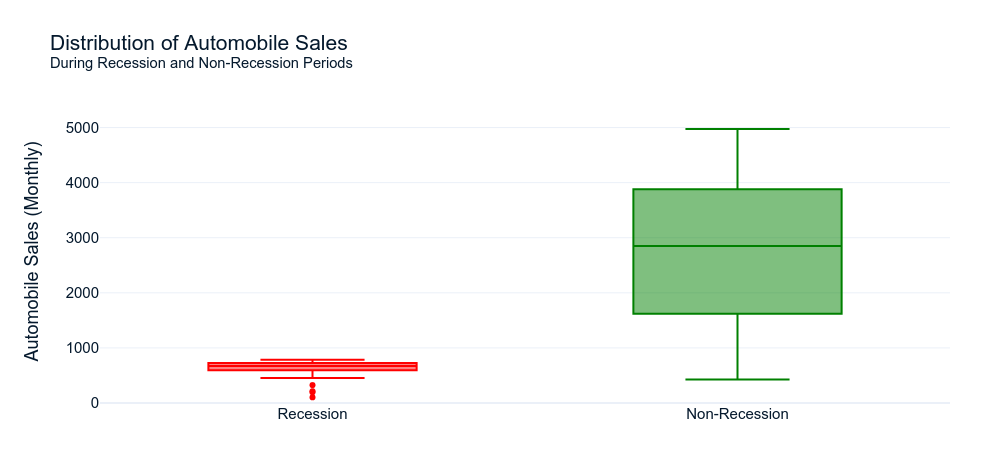

In [27]:
import plotly.express as px
from IPython.display import Image, display

# Convert 'Recession' column to string for better labeling in Plotly
df['Recession'] = df['Recession'].astype(str)

# Create a boxplot with Plotly
fig = px.box(df, x='Recession', y='Automobile_Sales', color='Recession',
             color_discrete_map={'0': 'green', '1': 'red'},
             labels={'Recession': '', 'Automobile_Sales': 'Automobile Sales (Monthly)'},
             title='Distribution of Automobile Sales<br><sup>During Recession and Non-Recession Periods</sup>')

# Increase font size, add left margin, remove the legend, add subtitle, update x-axis labels and y-axis limit
fig.update_layout(xaxis=dict(tickvals=['0', '1'], ticktext=['Non-Recession', 'Recession']),
                  yaxis=dict(range=[0, 5500]),
                  font=dict(size=15), 
                  margin=dict(l=100, b=0, r=50), 
                  showlegend=False)

# Save and display the plot 
fig.write_image("pictures/automobile_sales_distribution.png", width=1000, height=450)
display(Image("pictures/automobile_sales_distribution.png"))

In [15]:
# Calculate the mean automobile sales for recession and non-recession periods
mean_sales = df.groupby('Recession')['Automobile_Sales'].mean()

# Calculate the percentage decrease in sales during recession compared to non-recession
percent_decrease_in_sales = ((mean_sales[1] - mean_sales[0]) / mean_sales[0]) * 100

# Display the mean sales and the percentage decrease in sales
print(f"Mean Automobile Sales during Non-Recession Periods: {mean_sales[0]:.2f}")
print(f"Mean Automobile Sales during Recession Periods: {mean_sales[1]:.2f}")
print(f"Percentage Decrease in Sales during Recession: {percent_decrease_in_sales:.2f}%")

Mean Automobile Sales during Non-Recession Periods: 2816.75
Mean Automobile Sales during Recession Periods: 648.52
Percentage Decrease in Sales during Recession: -76.98%


The box plot visually emphasizes the stark contrast in automobile sales distribution between recession and non-recession periods. The non-recession period shows a much higher median and wider range of sales, while the recession period is characterized by a compressed, lower range of sales. The average sales drop by `77%` during recessions, highlighting the severe economic impact on the automotive industry.

---

## Is there a significant difference in automobile sales between recession and non-recession periods?

In [54]:
# Filter the data for recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Perform an independent t-test to compare automobile sales
t_stat, p_value = ttest_ind(recession_data['Automobile_Sales'], non_recession_data['Automobile_Sales'])

# Display the t-statistic and p-value
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in automobile sales between recession and non-recession periods.")
else:
    print("There is no significant difference in automobile sales between recession and non-recession periods.")

T-statistic: -14.7531
P-value: 1.7987e-41
There is a significant difference in automobile sales between recession and non-recession periods.


The statistical analysis provides strong evidence of a significant difference in automobile sales between recession and non-recession periods. The extremely low p-value (`1.7987e-41`) and high t-statistic (`-14.7531`) underscore the profound and consistent negative impact of recessions on the automotive market.

---

## How do automobile sales vary across different regions during recession periods?

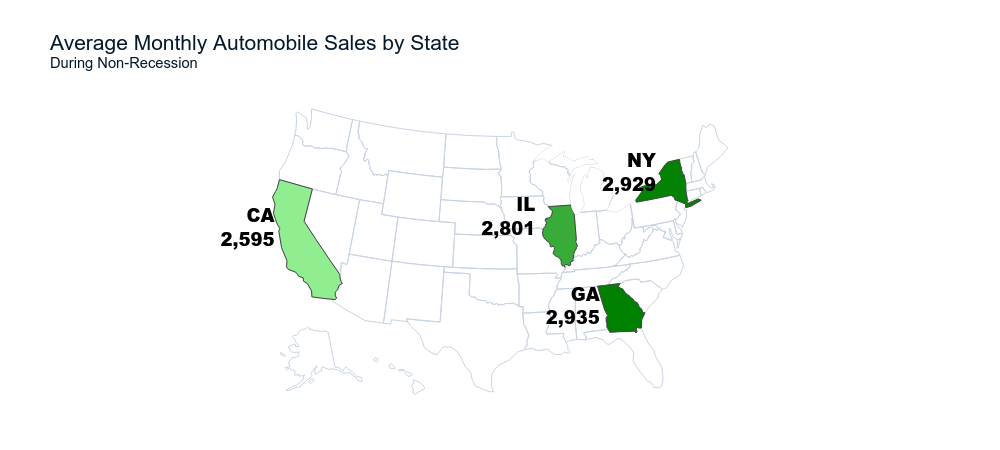

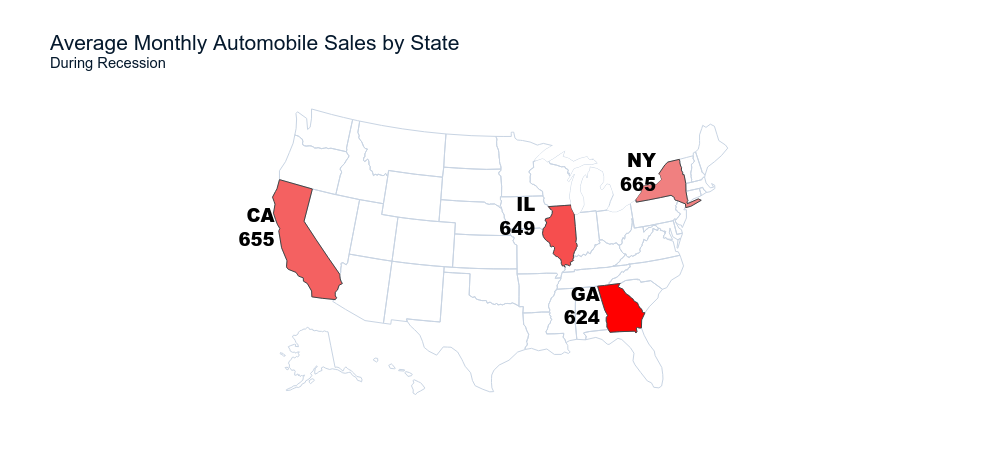

In [93]:
# Map city names to state abbreviations, including latitude and longitude
city_to_state = {
    'Georgia': {'abbr': 'GA', 'lat': 32.1656, 'lon': -82.9001},
    'California': {'abbr': 'CA', 'lat': 36.7783, 'lon': -119.4179},
    'Illinois': {'abbr': 'IL', 'lat': 40.6331, 'lon': -89.3985},
    'New York': {'abbr': 'NY', 'lat': 43.2994, 'lon': -74.2179}
}

# Define color scales and titles for the maps
map_configs = [
    (0, '<br><sup>During Non-Recession</sup>', ['lightgreen', 'green']),
    (1, '<br><sup>During Recession</sup>', ['red', 'lightcoral'])
]

# Create and show choropleth maps
for period, subtitle, color_scale in map_configs:
    data_subset = df[df['Recession'] == period]
    data_subset['State'] = data_subset['City'].map(lambda city: city_to_state[city]['abbr'])
    grouped_data = data_subset.groupby(['State'], as_index=False)['Automobile_Sales'].mean().round()
    
    fig = px.choropleth(grouped_data, 
                        locations='State', 
                        locationmode='USA-states', 
                        color='Automobile_Sales', 
                        hover_name='State',
                        scope='usa', 
                        title='Average Monthly Automobile Sales by State'+subtitle,
                        labels={'Automobile_Sales': 'Automobile Sales'},
                        color_continuous_scale=color_scale)
    
    for i, row in grouped_data.iterrows():
        state_info = next(item for item in city_to_state.values() if item['abbr'] == row['State'])
        fig.add_scattergeo(
            lat=[state_info['lat'], state_info['lat']-1],
            lon=[state_info['lon'], state_info['lon']-3],
            text=[None, f"{row['State']}<br>{row['Automobile_Sales']:,.0f}"],
            hovertext=f"Sales: {row['Automobile_Sales']:,.0f}",
            mode='lines+text',
            showlegend=False,
            textfont=dict(size=18, color='black', family="Arial Black"),
            line=dict(width=0, color='black'),
            marker=dict(size=0, color='black'),
            textposition="top left")

    
    fig.update_layout(font=dict(size=15), margin=dict(l=100, b=50, r=100), coloraxis=dict(showscale=False))

    # Save and display the plot 
    fig.write_image(f"pictures/automobile_sales_map{period}.png", width=1000, height=450)
    display(Image(f"pictures/automobile_sales_map{period}.png"))

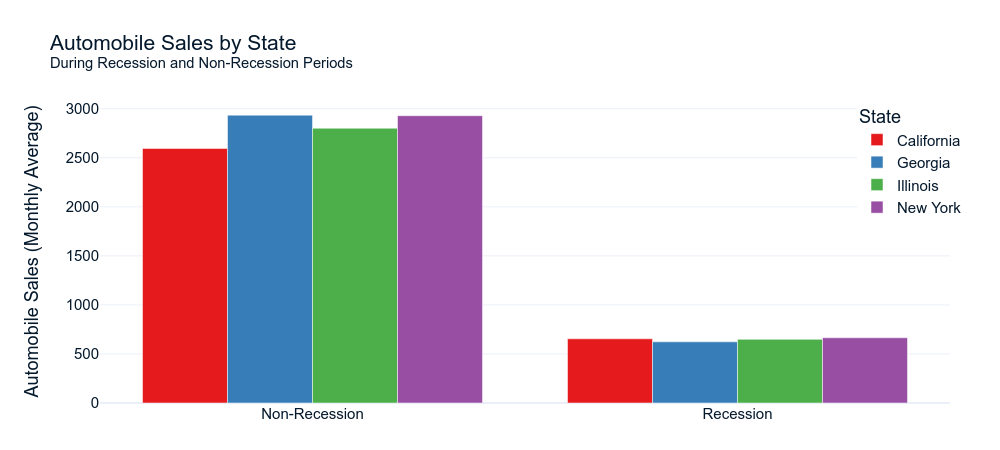

In [95]:
import plotly.express as px

# Calculate the average automobile sales by city and recession status
avg_sales = df.groupby(['City', 'Recession'])['Automobile_Sales'].mean().reset_index()

# Create a bar plot to visualize average automobile sales by city during recession and non-recession periods
fig = px.bar(avg_sales, x='Recession', y='Automobile_Sales', color='City', barmode='group',
             color_discrete_sequence=px.colors.qualitative.Set1,
             title='Automobile Sales by State<br><sup>During Recession and Non-Recession Periods</sup>',
             labels={'Automobile_Sales': 'Automobile Sales (Monthly Average)', 'Recession': '', 'City':'State'},
             category_orders={'Recession': [0, 1]})

# ..
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['Non-Recession', 'Recession']), 
                  font=dict(size=15), 
                  margin=dict(l=100, b=0, r=50),
                  legend=dict(xanchor='right', yanchor='top'))

# Save and display the plot 
fig.write_image("pictures/automobile_sales_by_state.png", width=1000, height=450)
display(Image("pictures/automobile_sales_by_state.png"))

In [96]:
# Group data by Recession and City, then calculate mean automobile sales
mean_sales = df.groupby(['Recession', 'City'], as_index=False)['Automobile_Sales'].mean().round()

# Pivot the table to have Recession as columns and City as rows
pivot_sales = mean_sales.pivot(index='City', columns='Recession', values='Automobile_Sales').reset_index()

# Rename columns for more informative names
pivot_sales.columns = ['City', 'Non_Recession', 'Recession']

# Calculate the percentage decrease in sales during recession for each city
pivot_sales['Perc_Decrease'] = (((pivot_sales['Non_Recession'] - pivot_sales['Recession']) / pivot_sales['Non_Recession']) * 100).round(1)

# Display the dataframe with percentage decrease
pivot_sales.sort_values('Perc_Decrease')

,City,Non_Recession,Recession,Perc_Decrease
0,California,2595.0,655.0,74.8
2,Illinois,2801.0,649.0,76.8
3,New York,2929.0,665.0,77.3
1,Georgia,2935.0,624.0,78.7


Automobile sales across different regions show similar patterns of decline during recessions, with Georgia experiencing the steepest drop (`78.7%`). Interestingly, California, despite having the lowest non-recession sales, shows the smallest percentage decrease (`74.8%`) during recessions, indicating potentially more resilient market conditions in this state.

---

## How does the recession impact sales of different vehicle types?

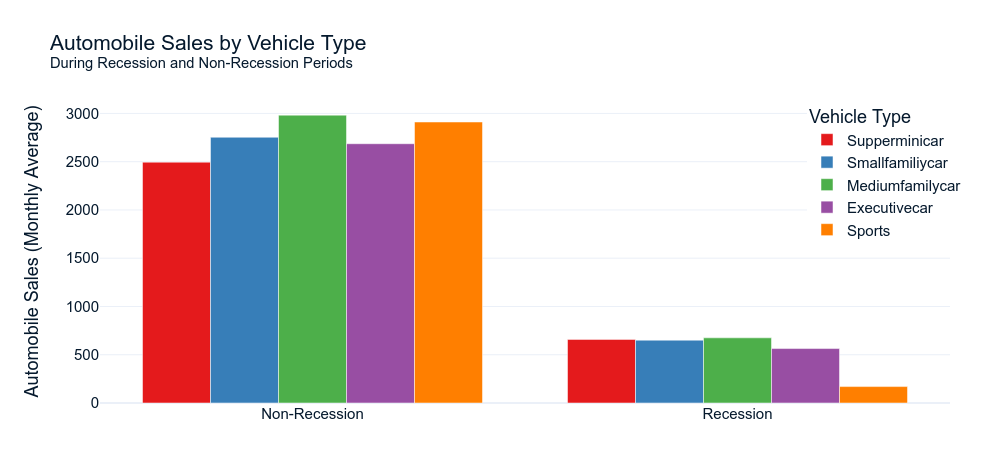

In [32]:
import plotly.express as px

# Group data by Recession and Vehicle_Type, then calculate mean automobile sales
mean_sales_vehicle = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean().round()

# Define the order of vehicle types to be displayed in the plot
vehicle_order = ["Supperminicar", "Smallfamiliycar", "Mediumfamilycar", "Executivecar", "Sports"]

# Create a bar plot for automobile sales during recession and non-recession periods using Plotly
fig = px.bar(mean_sales_vehicle, 
             x='Recession', 
             y='Automobile_Sales', 
             color='Vehicle_Type', 
             barmode='group',  # Add this line to make bars not stacked
             category_orders={'Vehicle_Type': vehicle_order},
             color_discrete_sequence=px.colors.qualitative.Set1,
             labels={'Recession': '', 'Automobile_Sales': 'Automobile Sales (Monthly Average)', 'Vehicle_Type':'Vehicle Type'},
             title='Automobile Sales by Vehicle Type<br><sup>During Recession and Non-Recession Periods</sup>')

# ..
fig.update_layout(xaxis=dict(tickvals=[0, 1], ticktext=['Non-Recession', 'Recession']), 
                  font=dict(size=15), 
                  margin=dict(l=100, b=0, r=50),
                  legend=dict(xanchor='right', yanchor='top'))

# Save and display the plot
fig.write_image("pictures/automobile_sales_by_vehicle_type.png", width=1000, height=450)
display(Image("pictures/automobile_sales_by_vehicle_type.png"))

In [97]:
# Group data by Recession and Vehicle_Type, then calculate mean automobile sales
mean_sales_by_type = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean().round()

# Pivot the table to have Recession as columns and Vehicle_Type as rows
pivot_sales_by_type = mean_sales_by_type.pivot(index='Vehicle_Type', columns='Recession', values='Automobile_Sales').reset_index()

# Rename columns for more informative names
pivot_sales_by_type.columns = ['Vehicle_Type', 'Non_Recession', 'Recession']

# Calculate the percentage decrease in sales during recession for each vehicle type
pivot_sales_by_type['Perc_Decrease'] = (((pivot_sales_by_type['Non_Recession'] - pivot_sales_by_type['Recession']) / pivot_sales_by_type['Non_Recession']) * 100).round(1)

# Display the dataframe with percentage decrease
pivot_sales_by_type.sort_values('Perc_Decrease')

,Vehicle_Type,Non_Recession,Recession,Perc_Decrease
4,Supperminicar,2495.0,659.0,73.6
2,Smallfamiliycar,2753.0,651.0,76.4
1,Mediumfamilycar,2982.0,675.0,77.4
0,Executivecar,2686.0,564.0,79.0
3,Sports,2911.0,170.0,94.2


The recession dramatically impacts automobile sales across all vehicle types, with sports cars experiencing the most severe decline (`94.2%` decrease). While all categories see significant drops, economy models like superminicar and smallfamilycar are relatively less affected, suggesting consumers prioritize affordability during economic downturns.

---